In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from pprint import pprint
import seaborn as sns

sys.path.append("../")
from stocks_feed.dataloader import Stock, Index
from stocks_feed.plotter import Plot

load_dotenv() 

True

In [4]:
idx = Index()

In [5]:
df_sp500 = idx.df

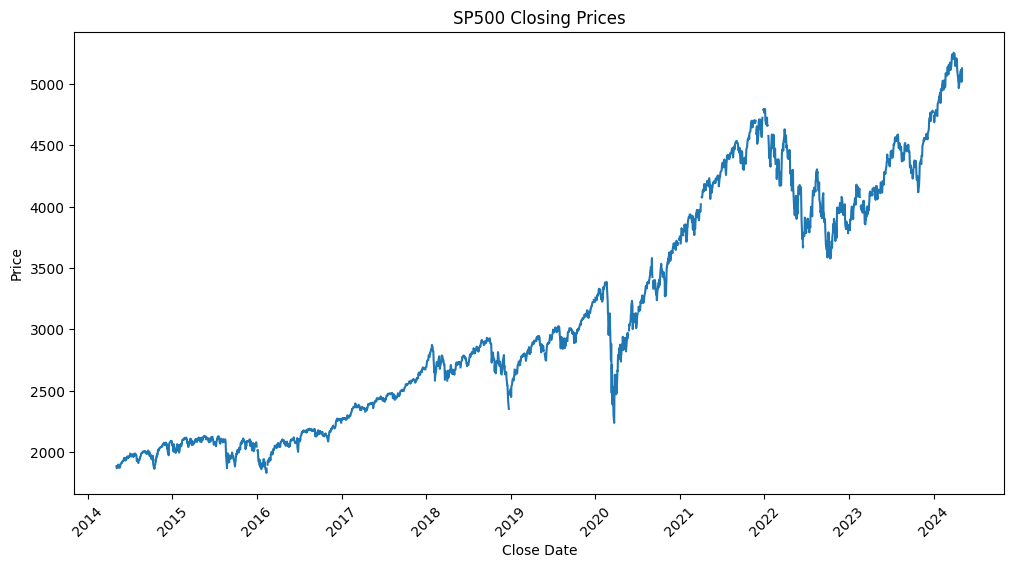

In [6]:
Plot.plot_timeseries(df_sp500.index, df_sp500["close"], 'Close Date', "Price", "SP500 Closing Prices")

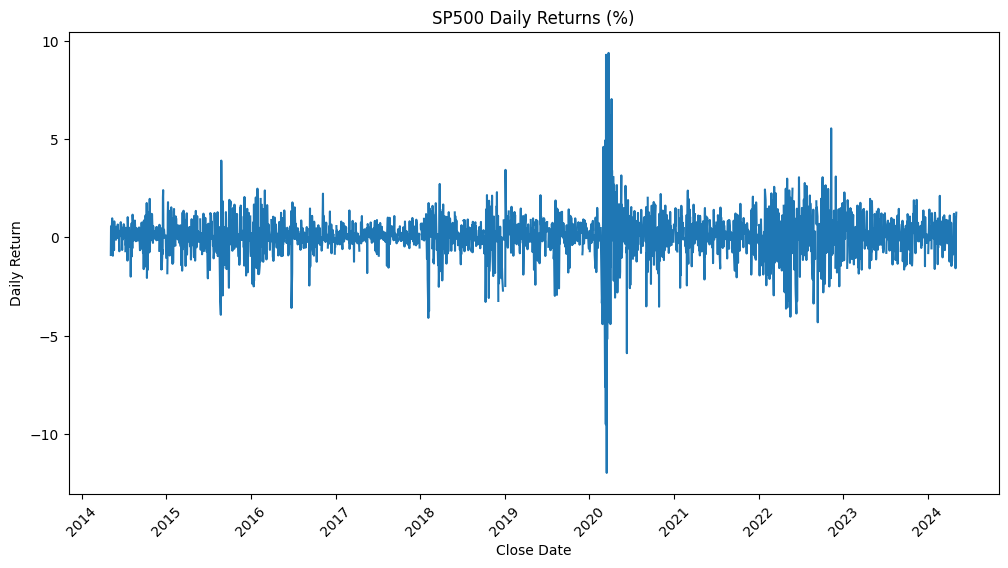

In [7]:
Plot.plot_timeseries(df_sp500.index, df_sp500["daily_return"] * 100, 'Close Date', "Daily Return", "SP500 Daily Returns (%)")

In [8]:
s = Stock("SYF", "2023-01-01", "2024-01-01")

In [9]:
s.df

,v,vw,o,c,h,l,t,n,ticker,close_lag_1,daily_return
2023-01-03,4697690.0,32.5568,33.25,32.39,33.500,32.100,1672722000000,43101,SYF,NaN,NaN
2023-01-04,5922686.0,33.1342,32.87,33.10,33.540,32.730,1672808400000,50972,SYF,32.39,0.021920
2023-01-05,5777245.0,32.2052,32.61,31.98,32.610,31.950,1672894800000,50009,SYF,33.10,-0.033837
2023-01-06,9003571.0,32.4912,31.75,32.80,32.830,31.740,1672981200000,76942,SYF,31.98,0.025641
2023-01-09,9784771.0,32.6435,33.16,32.29,33.300,32.230,1673240400000,70388,SYF,32.80,-0.015549
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2337439.0,38.1083,38.27,37.94,38.440,37.840,1703221200000,27396,SYF,38.05,-0.002891
2023-12-26,1939456.0,38.2218,38.13,38.27,38.335,37.910,1703566800000,22074,SYF,37.94,0.008698
2023-12-27,1722713.0,38.2761,38.18,38.35,38.405,38.045,1703653200000,22798,SYF,38.27,0.002090
2023-12-28,1792737.0,38.3629,38.34,38.37,38.510,38.225,1703739600000,20641,SYF,38.35,0.000522


In [10]:
s.ticker

'SYF'

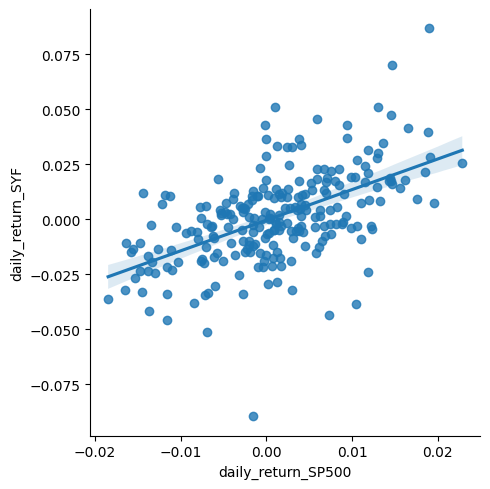

In [11]:
Plot.plot_regression(df_sp500, s.df, "_" + s.ticker)

calculate the parameter estimates for stock S returns regressed against SP500 returns for a given year

In [12]:
import statsmodels.api as sm

In [13]:
stock_returns = s.df["daily_return"]

In [14]:
index_returns = idx.df["daily_return"]

In [15]:
df = pd.concat([stock_returns, index_returns], axis=1).dropna()
col_names = [s.ticker, "SP500"]
df.columns = col_names
df


,SYF,SP500
2023-01-04,0.021920,0.007539
2023-01-05,-0.033837,-0.011646
2023-01-06,0.025641,0.022841
2023-01-09,-0.015549,-0.000768
2023-01-10,0.017033,0.006978
...,...,...
2023-12-21,0.019287,0.010301
2023-12-22,-0.002891,0.001660
2023-12-27,0.002090,0.001430
2023-12-28,0.000522,0.000370


In [16]:
y = df[s.ticker]
X = df["SP500"]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()

In [17]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    SYF   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     101.6
Date:                Sat, 04 May 2024   Prob (F-statistic):           3.91e-20
Time:                        13:28:14   Log-Likelihood:                 628.67
No. Observations:                 240   AIC:                            -1253.
Df Residuals:                     238   BIC:                            -1246.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.001     -0.374      0.7

In [18]:
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 

In [19]:
results.params

const   -0.000431
SP500    1.394171
dtype: float64

In [20]:
alpha = results.params["const"]
beta = results.params["SP500"]

In [21]:
daily_mkt_vol_perc = np.std(X["SP500"]) * 100

In [22]:
daily_idio_vol_perc = np.std(y - (alpha + beta * X["SP500"])) * 100

In [23]:
NMV = 10_000_000

In [24]:
alpha_ann_perc = alpha * 240 * 100

In [44]:
alpha_CI_ann_perc = results.conf_int().loc["const"] * 100 * 240
beta_CI = results.conf_int().loc["SP500"]

In [37]:
results.conf_int()

,0,1
const,-0.00270,0.001839
SP500,1.12175,1.666592


In [40]:
results.conf_int().loc["SP500"]

0    1.121750
1    1.666592
Name: SP500, dtype: float64

In [45]:
alpha_CI_ann_perc

0   -64.810345
1    44.125698
Name: const, dtype: float64